<a href="https://colab.research.google.com/github/amutharun/GenAIWorkshop/blob/main/RAG_A_Complete_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 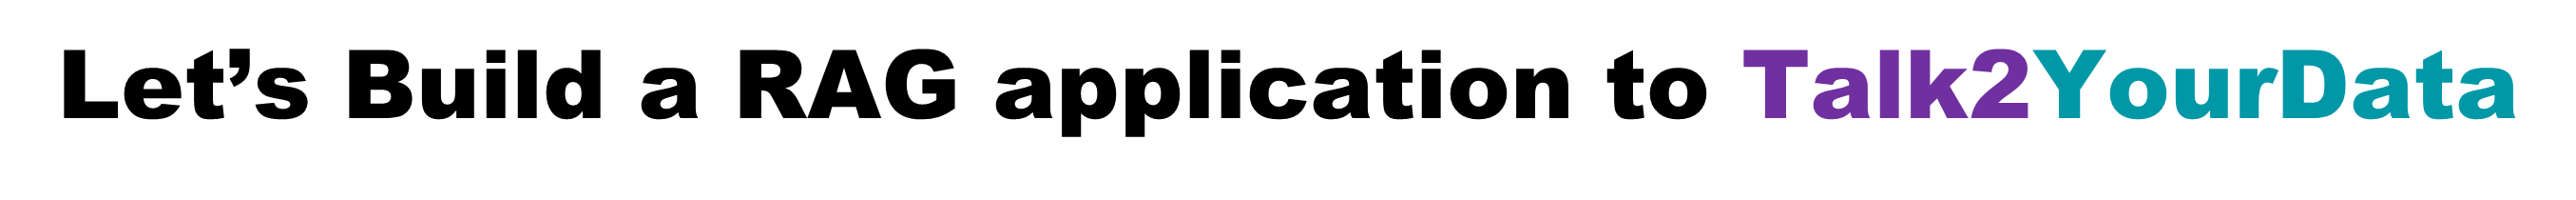

# Introduction

Large Language Models (LLMs) are powerful tools for generating human-like text, but they have limitations.

Retrieval Augmented Generation (RAG) addresses these challenges, enhancing LLMs by integrating retrieval mechanisms. This approach ensures that the content LLMs produce is both contextually relevant and factually accurate. RAG acts as a bridge, connecting LLMs to vast knowledge sources. As AI becomes increasingly used for diverse tasks, the accuracy and relevance of the generated information are crucial.

RAG meets this demand, making AI interactions more informative and context-aware.

# Building Blocks of a RAG System

Before building out a RAG system, it's essential to familiarize yourself with the tools that make this process possible.

Each tool plays a specific role, ensuring that the RAG system operates efficiently and effectively.

**LLM**: At the heart of the system is the LLM, the core AI model responsible for generating human-like text responses.

**Document Loader**: With vast amounts of data to process, the Document Loader is essential. It imports and reads documents, preparing them for chunking and embedding.

**Document Chunker**: To make the data more manageable and efficient for retrieval, the Document Chunker breaks documents into smaller, more digestible pieces.

**Embedder**: Before storing or retrieving data, we need to convert textual information into a format the system can understand. The Embedder takes on this role, transforming text into vector representations.

**Vector Store**: This is where the magic happens. The Vector Store is a dedicated storage system that houses embeddings and their corresponding textual data, ensuring quick and efficient retrieval.

**Vector Store Retriever**: Think of this as the search engine of the system. The Vector Store Retriever fetches relevant documents by comparing vector similarities, ensuring that the most pertinent information is always at hand.

**Prompt**: Every interaction starts with a user's query or statement. The Prompt captures this initial input, setting the stage for the retrieval and generation processes.

**User Input**: Last but not least, the User Input tool captures the query or statement provided by the end-user, initiating the entire RAG process.


# The RAG System and Its Subsystems

The primary goal of RAG is to provide LLMs with contextually relevant and factually accurate information, ensuring that the generated content meets the highest standards of quality and relevance.

To achieve this, the RAG system is divided into subsystems, each playing a crucial role in the overall process. The tools integral to the RAG system are not standalone entities; they interweave to form the subsystems that drive the RAG process.

Each tool fits within one of the following subsystems:

1) Index

2) Retrieval

3) Augment

These work together as an orchestrated flow that transforms a user's query into a contextually rich and accurate response.


RAG, introduced by Meta is a powerful technique that combines **prompt engineering with context retrieval from external data sources** to improve the performance and relevance of LLMs.

By grounding the model on additional information, it allows for more accurate and context-aware responses.

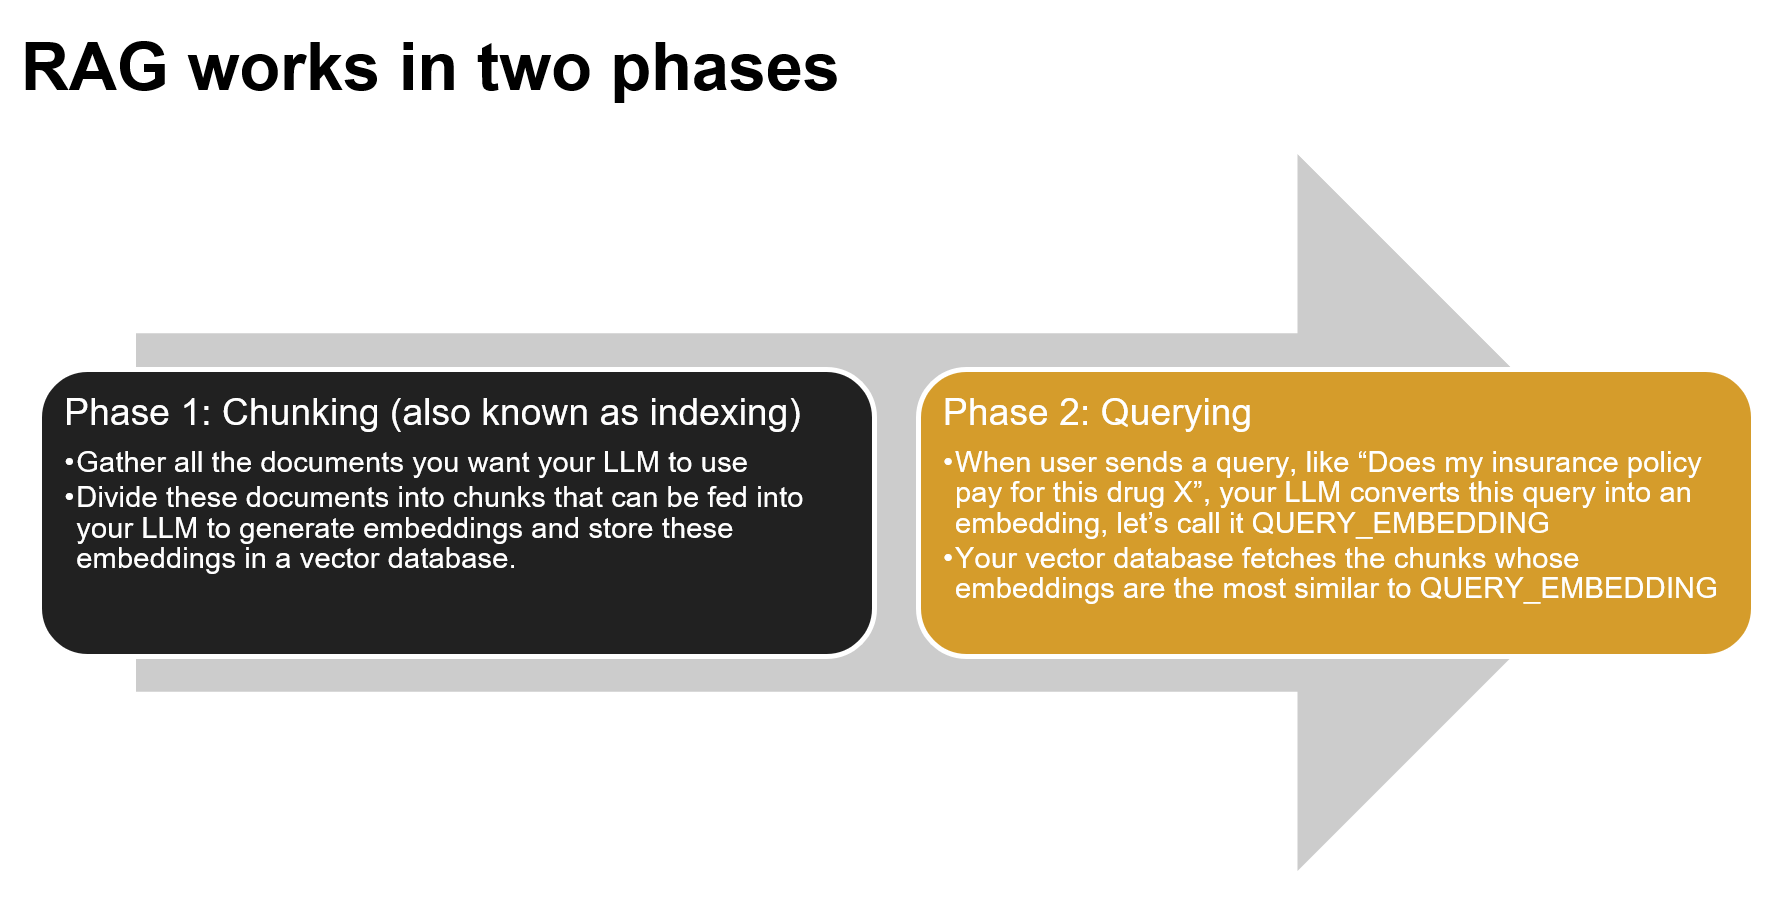

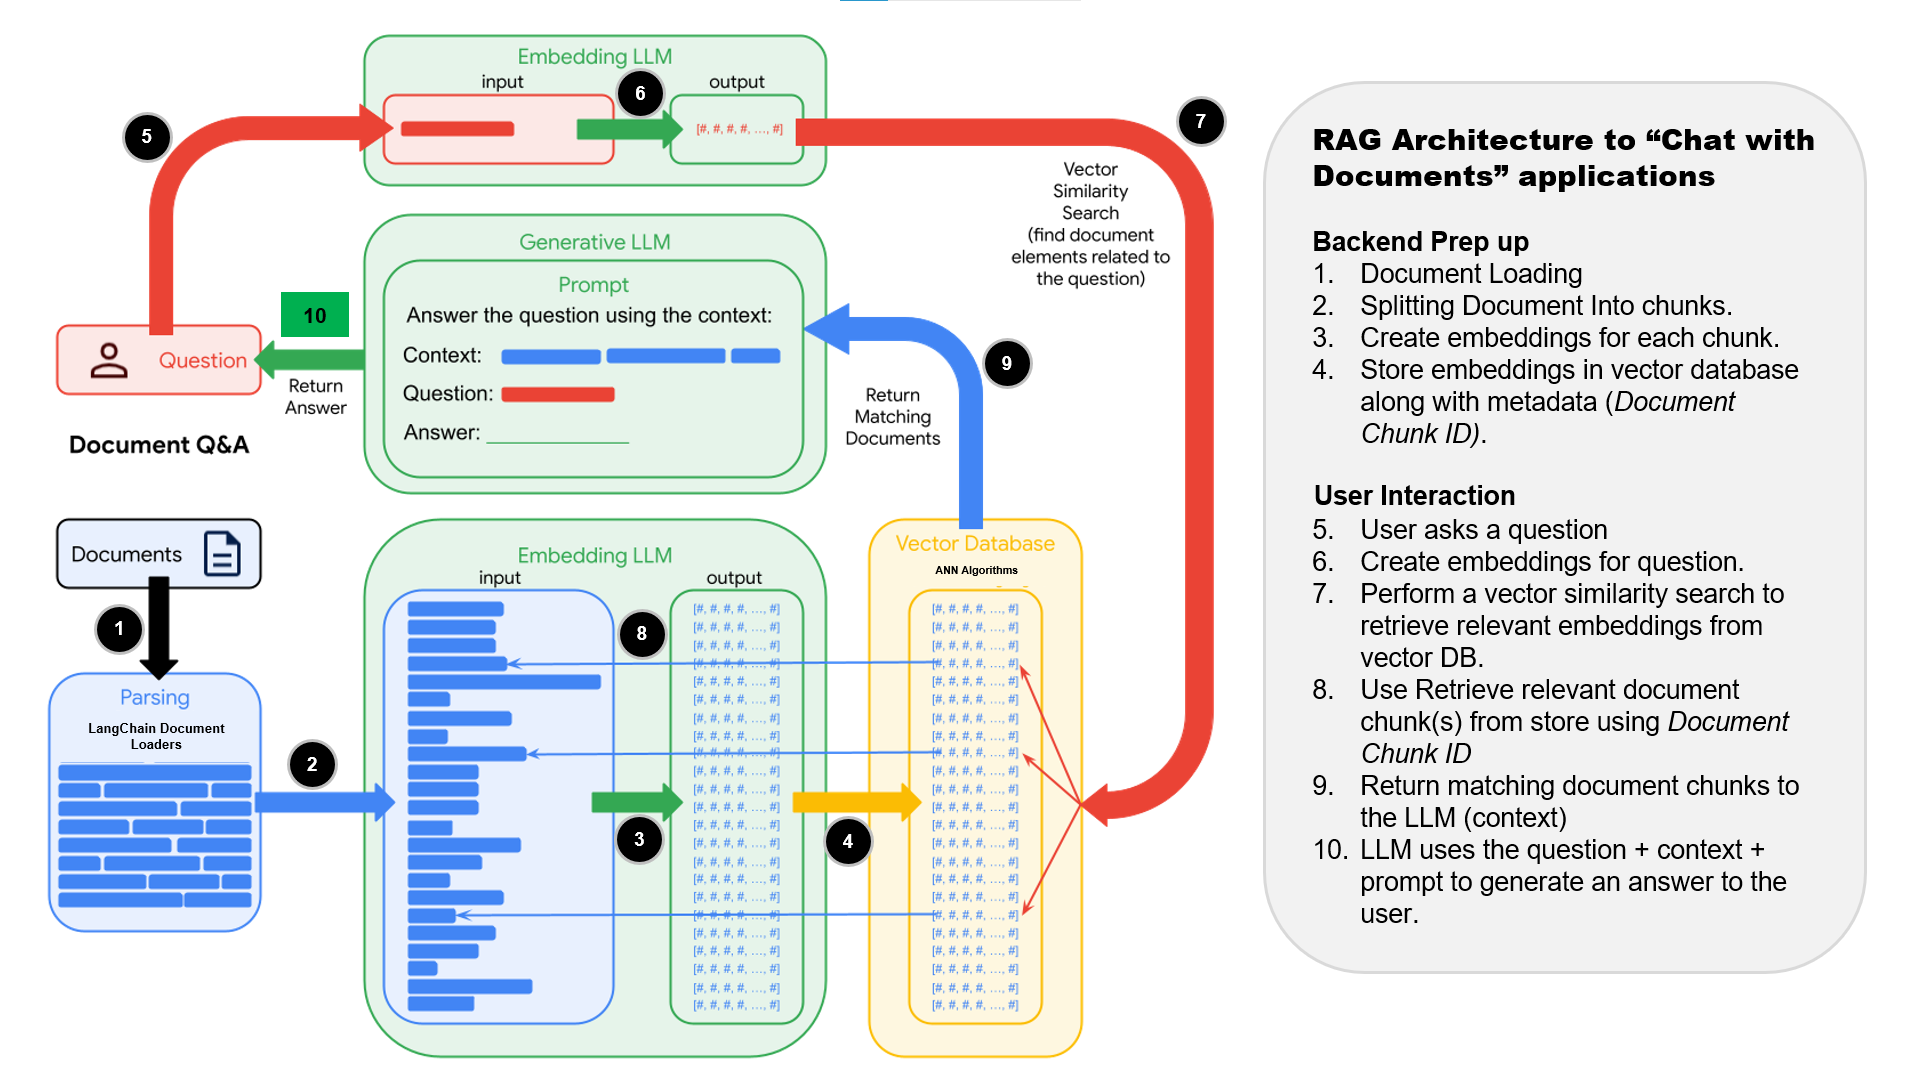

# 1. Document Loading And Splitting


To enable document-based chatting, the initial step involves loading the document. The process entails splitting the document, creating embeddings, and storing them in a database for future querying and answering user questions. Let's begin by understanding how to load a PDF document.

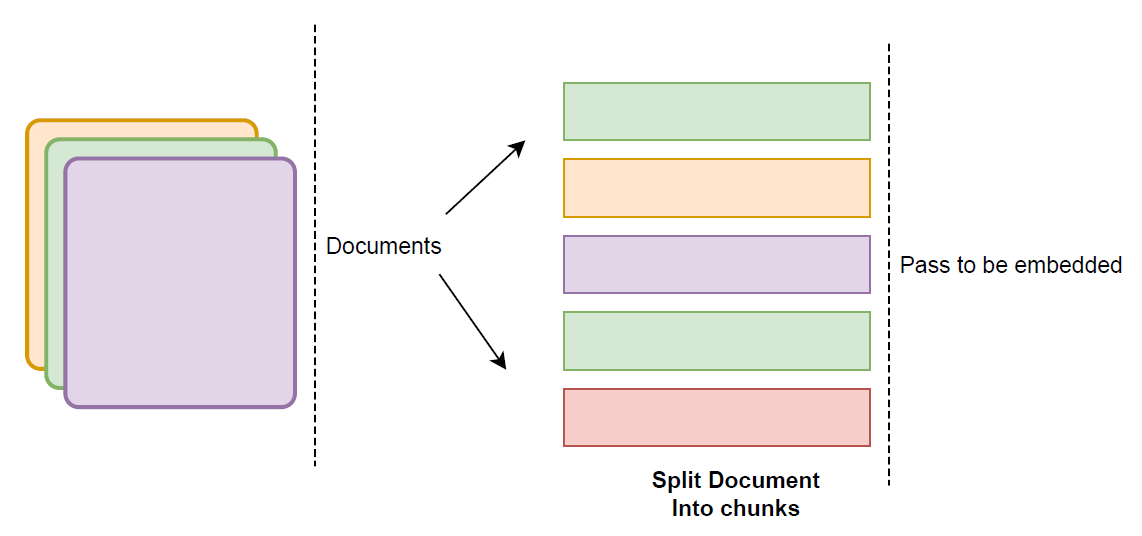

In [ ]:
!pip install pypdf==3.12.0 langchain==0.0.311 sentence-transformers==2.2.2 chromadb==0.3.26 openai==0.27.8 tiktoken==0.4.0

In [2]:
!pip install --upgrade python-dotenv

In [3]:
# load env vars
from dotenv import load_dotenv
import os
import openai
load_dotenv()

# if directly using open ai api key
# openai.api_key = os.getenv("OPENAI_API_KEY")
# openai.api_type = "openai"

# if we are using the azure open ai deployed model
openai.api_type = "azure"
openai.api_version = os.getenv("AZURE_API_VERSION"),
openai.api_base = os.getenv("AZURE_OPENAI_ENDPOINT")  # Your Azure OpenAI resource's endpoint value.
openai.api_key = os.getenv("AZURE_OPENAI_API_KEY")

In [6]:
# # load env vars

# from dotenv import load_dotenv
# import openai
# import os
# load_dotenv()

# # API configuration
# openai.api_key = os.getenv("OPENAI_API_KEY")

# # for LangChain
# os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [ ]:
# openai.api_key = "sk-xxx" # Workshop key.

In [4]:
from langchain.document_loaders import PyPDFLoader
from langchain.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain.vectorstores import Chroma

In [5]:
PDF_PATH = "/content/Rich-Dad-Poor-Dad.pdf"

# create loader
loader = PyPDFLoader(PDF_PATH)

## **Document Splitting**


**Can we use the whole book as is on ChatGPT?**
* When working with a whole book, copying and pasting it into chatGPT won't work due to the limitations of LLMs in processing large amounts of text at once.

**What is a context window?**
* LLMs have a context window, which is the span of text or tokens the model uses to generate or understand specific words or sequences within a sentence or text.
* The context window determines how much surrounding text the model considers for predictions or language processing.
* Due to the limitations of the context window, it is necessary to split the loaded PDF file into smaller sections referred to as "chunks" that can fit within the context window.

In [6]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

def chunkByWord(text):
    return len(text.split(" "))

text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, length_function = chunkByWord, chunk_overlap=30, add_start_index = False)

rec_chunks = text_splitter.split_documents(loader.load())

## Let's understand Text Splitting using Text Splitter Playground

https://langchain-text-splitter.streamlit.app/

In [7]:
len(rec_chunks)

233

In [9]:
rec_chunks[1]

Document(page_content='“Rich Dad Poor Dad  is a starting point for anyone looking to  \ngain control of their financial future.”\n     – USA TODAY', metadata={'source': '/content/Rich-Dad-Poor-Dad.pdf', 'page': 1})

In [12]:
rec_chunks[5]

Document(page_content='Best-selling Books \nby Robert T. Kiyosaki  \nRich Dad Poor Dad  \nWhat the Rich Teach Their Kids About Money –  \nThat the Poor and Middle Class Do Not\nRich Dad’s CASHFLOW Quadrant\nGuide to Financial Freedom\nRich Dad’s Guide to Investing\nWhat the Rich Invest in That the Poor and Middle Class Do Not\nRich Dad’s Rich Kid Smart Kid\nGive Your Child a Financial Head Start\nRich Dad’s Retire Young Retire Rich\nHow to Get Rich and Stay Rich\nRich Dad’s Prophecy\nWhy the Biggest Stock Market Crash in History Is Still Coming...\nAnd How You Can Prepare Yourself and Profit from It!\nRich Dad’s Success Stories\nReal-Life Success Stories from Real-Life People  \nWho Followed the Rich Dad Lessons\nRich Dad’s Guide to Becoming Rich  \nWithout Cutting Up Your Credit Cards  \nT urn Bad Debt into Good Debt\nRich Dad’s Who T ook My Money?\nWhy Slow Investors Lose and Fast Money Wins!  \nRich Dad Poor Dad for T eens\nThe Secrets About Money – That You Don’t Learn In School!  

# Embeddings and Vector Stores

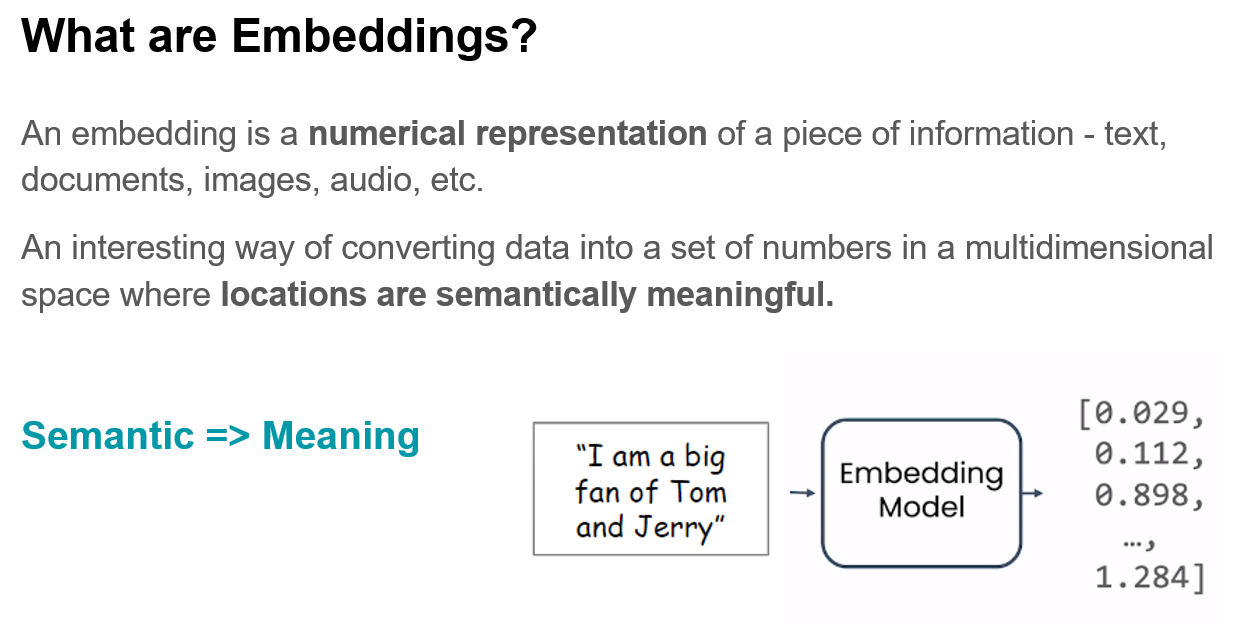


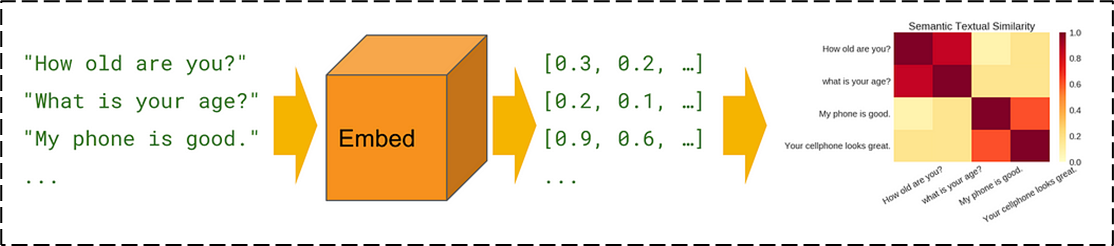

## Vector Database
Vector databases are a new database category that stores vectors or embeddings and performs similarity searches

---



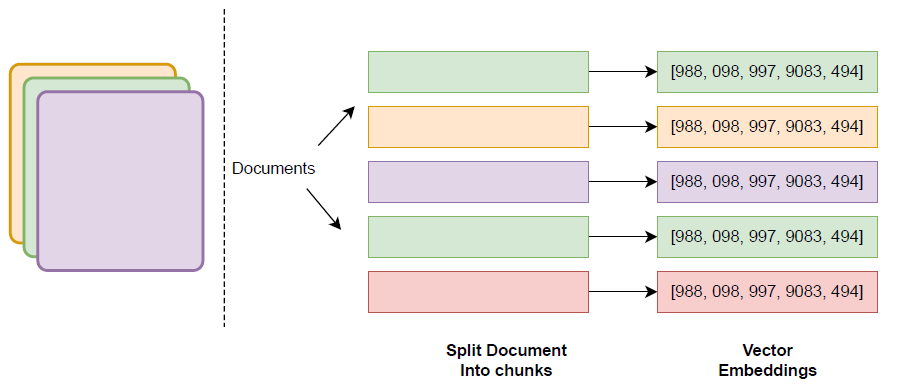

Let's try to use an open source embedding model which is inbuilt on LangChain, SentenceTransformerEmbedding

Now, let’s use this to create an embedding class object that we’ll use to embed our documents(chunks) we loaded.


In [18]:
import openai
from openai.embeddings_utils import get_embedding
from langchain.embeddings.openai import OpenAIEmbeddings

embedding_model =  "EA-ADAembedding" # Deployment name of "text-embedding-ada-002"

openai_embeddings = OpenAIEmbeddings(deployment="EA-ADAembedding",
                              openai_api_key=os.getenv("AZURE_OPENAI_API_KEY"),
                              openai_api_base=os.getenv("AZURE_OPENAI_ENDPOINT"),
                              openai_api_version=os.getenv("AZURE_API_VERSION"),
                              openai_api_type="azure")



# # embedding model parameters
# embedding_model = "text-embedding-ada-002"
# embedding_encoding = "cl100k_base"  # this the encoding for text-embedding-ada-002
# max_tokens = 8000  # the maximum for text-embedding-ada-002 is 8191

# embeddings_openai = OpenAIEmbeddings(openai_api_key = openai.api_key)

**Open Source Embedding Model**

If you're interested in trying an open source embedding model which can be downloaded from huggingfaces try **Sentence Transformer model**

https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

**all-MiniLM-L6-v2** is a sentence-transformers model: It maps sentences & paragraphs to a **384 dimensional dense vector space** and can be used for tasks like clustering or semantic search.

In [ ]:
# open source embeddings alternative to open ai embeddings.
embedding_func = SentenceTransformerEmbeddings(
    model_name="all-MiniLM-L6-v2"
)

In [138]:
# create vector store
vectordb = Chroma.from_documents(
    documents=rec_chunks,
    # embedding=embedding_func, # if you wanna try open source embeddings
    embedding = openai_embeddings,
    persist_directory=f"vector_db",
    collection_name="rich_dad_poor_dad")

# make vector store persistant
vectordb.persist()

Yayy!! *pat yourself on your back*... you have your own vector db created.

Running this code may take some time depending on the size of the document you are working with. Please be patient as the process completes. Once finished, you will notice a folder named "vector_db" created. This indicates that the entire PDF document has been successfully converted into vector embeddings and stored in a Chroma database, also known as a vector store.

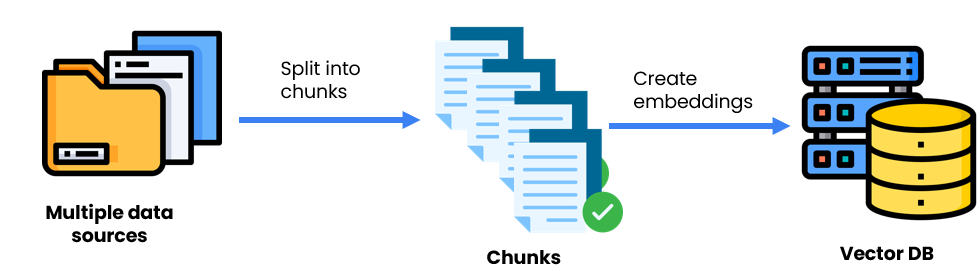

# **This marks the successful completion of phase 1 of RAG**

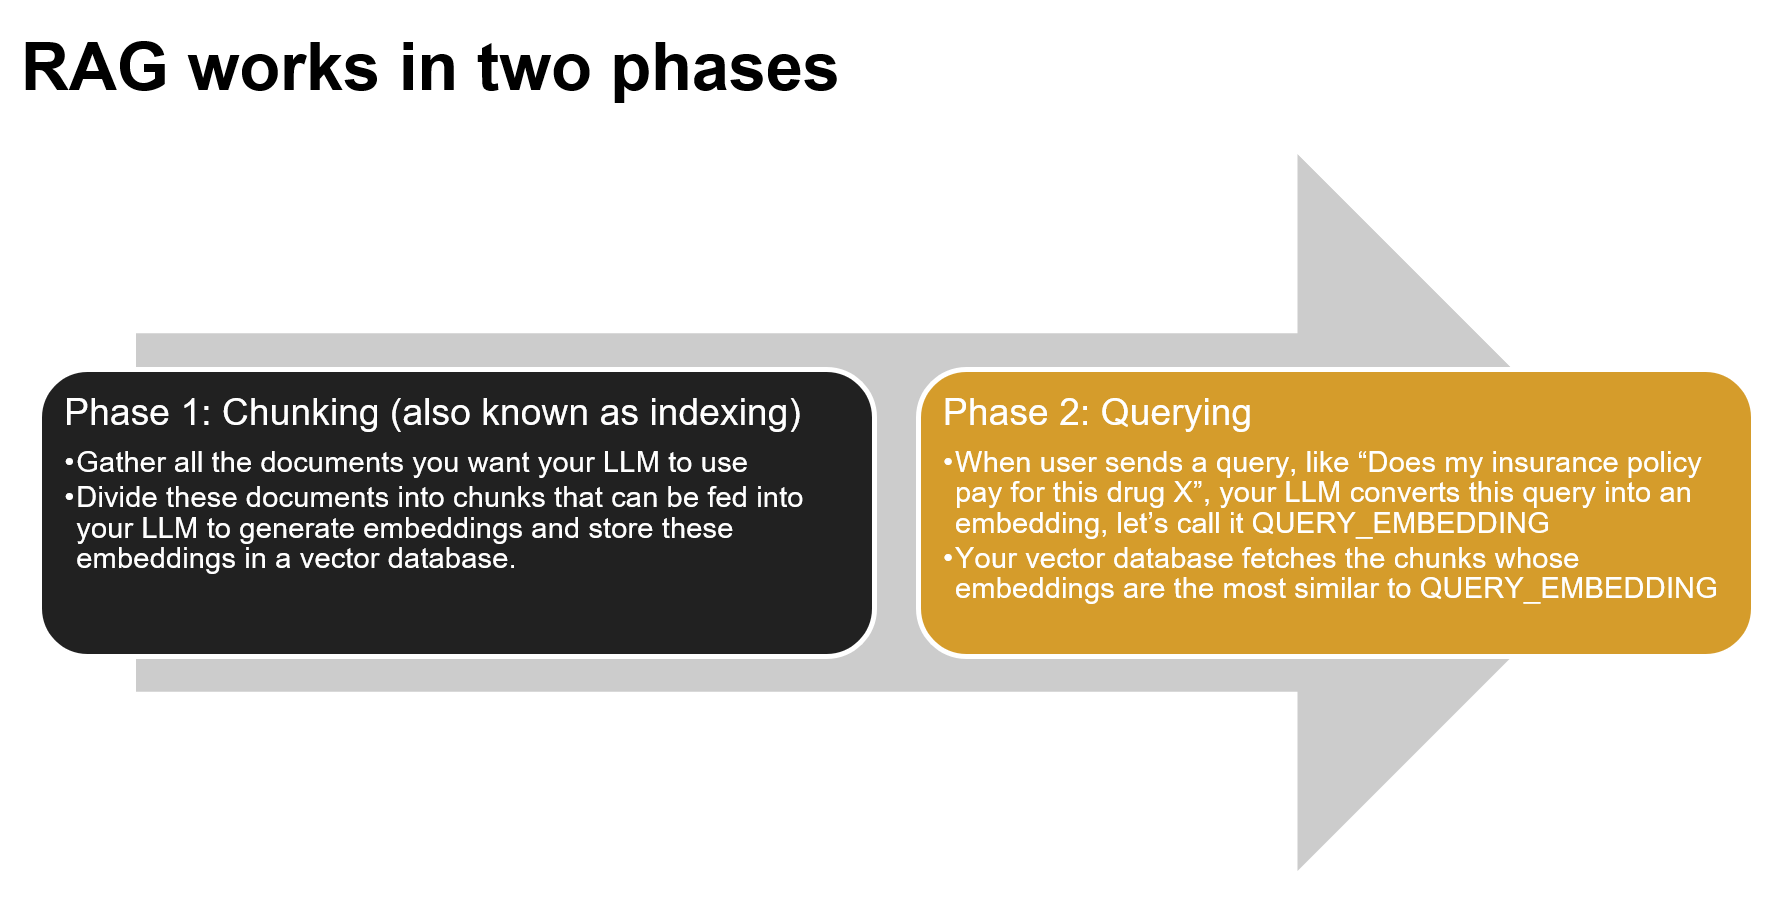

## Phase 2 of RAG : Querying and Retrieval
A retriever is an interface that returns documents for a given query from a vector store.

*Let's understand the various retrival techniques using a bunch of simulated text about Python. We will discuss about*

**Search Types**
* Semantic Similarity Search
* Maximum Marginal Relevance (MMR)

**Advanced Retriever Types**
* Contextual Compression Retriver
* Self Query Retriver
* Hybrid Search - Semantic + Keyword Search
* Merger Retrievers : Ensemble Retriver, Lord of Retrivers (LoTR)

**Chains in LangChain and its types**
* Map Reduce
* Refine
* Stuff

## Semantic Search

In [16]:
from langchain.vectorstores import Chroma

In [17]:
# 25 Documents related to Python

TEXT = ["Python is a versatile and widely used programming language known for its clean and readable syntax, which relies on indentation for code structure.",
        "Python is a general-purpose language suitable for web development, data analysis, AI, machine learning, and automation. Python offers an extensive standard library with modules covering a broad range of tasks, making it efficient for developers.",
    "Python is cross-platform, running on Windows, macOS, Linux, and more, allowing for broad application compatibility.",
    "Python has a large and active community that develops libraries, provides documentation, and offers support to newcomers.",
    "Python has particularly gained popularity in data science and machine learning due to its ease of use and the availability of powerful libraries and frameworks.",
    "Python supports multiple programming paradigms, including procedural, object-oriented, and functional programming.",
    "Python language emphasizes code readability, making it easier to understand, write, and maintain.",
    "Python can be embedded in other languages and applications, providing seamless integration capabilities.",
    "Python has an interactive shell, allowing for prototyping and quick experimentation with code.",
    "Python's syntax and dynamic typing result in shorter development cycles and increased productivity.",
    "The language has extensive documentation and an active user community, making it accessible for beginners.",
    "Python supports modular programming through the use of modules and packages.",
    "Python has built-in support for handling exceptions and robust error handling.",
    "Python offers built-in testing frameworks, enabling unit testing and ensuring code reliability.",
    "Python programming language has a vast ecosystem of third-party libraries that extend its functionality.",
    "Python's simplicity and ease of learning make it an excellent choice for beginner programmers.",
    "Python provides high-level data structures such as lists, dictionaries, and sets for efficient data manipulation.",
    "Python can be used for developing web applications using frameworks like Django and Flask.",
    "The language Python has a garbage collector that manages memory allocation and deallocation, relieving developers from manual memory management.",
    "Python's package management system, pip, allows easy installation and management of external libraries.",
    "Python supports multithreading and multiprocessing, enabling concurrent and parallel execution of code.",
    "Python supports integration with databases, providing libraries for working with various database systems.",
    "The language Python often referred as 'Py', offers capabilities for network programming and interacting with network services.",
    "Python has gained strong community support in data science, with numerous online resources, forums, and tutorials available.",
    "Python has become popular for data science due to new useful packages."]

meta_data = [
    {"source": "document 1", "page": 1},
    {"source": "document 2", "page": 2},
    {"source": "document 3", "page": 3},
    {"source": "document 4", "page": 4},
    {"source": "document 5", "page": 5},
    {"source": "document 6", "page": 6},
    {"source": "document 7", "page": 7},
    {"source": "document 8", "page": 8},
    {"source": "document 9", "page": 9},
    {"source": "document 10", "page": 10},
    {"source": "document 11", "page": 11},
    {"source": "document 12", "page": 12},
    {"source": "document 13", "page": 13},
    {"source": "document 14", "page": 14},
    {"source": "document 15", "page": 15},
    {"source": "document 16", "page": 16},
    {"source": "document 17", "page": 17},
    {"source": "document 18", "page": 18},
    {"source": "document 19", "page": 19},
    {"source": "document 20", "page": 20},
    {"source": "document 21", "page": 21},
    {"source": "document 22", "page": 22},
    {"source": "document 23", "page": 23},
    {"source": "document 24", "page": 24},
    {"source": "document 25", "page": 25}
]


Create a vector db by embedding the documents using Open AI embeddings or using any other open source embedder like Sentence Transformer

In [ ]:
# from langchain.embeddings.sentence_transformer import SentenceTransformerEmbeddings
# embedding_function = SentenceTransformerEmbeddings(
#     model_name="all-MiniLM-L6-v2"
# )

In [52]:
# Create a vector db

vector_db = Chroma.from_texts(
    texts=TEXT,
    # embedding=embedding_function,
    embedding=openai_embeddings,
    metadatas=meta_data
)

In [ ]:
dir(vector_db)

### Supporting Functions to print responses beautifully

In [26]:
def print_resp_and_source(response):
  """Function to display the Source document and metadata"""
  for res in range(len(response)):
    print(f"==> Content {res+1}: {response[res].page_content}")
    print(f"==> Source {res+1}: {response[res].metadata}")
    print("--------------------------------------------------------------------------------------------------------")

In [50]:
def print_source_relevance_score(response):
  """Function to display the Source document and metadata"""
  for res in range(len(response)):
      print(f"==> Content {res+1}: {response[res][0].page_content}")
      print(f"==> Source {res+1}: {response[res][0].metadata}")
      print(f"==> Similarity Score :{round(response[res][1],2)} ")
      print("--------------------------------------------------------------------------------------------------------")

### Semantic Search using Vector DB

In [83]:
# Sematic Similarity Search using ChromaDB
response = vector_db.similarity_search_with_relevance_scores(
    query="Tell me about a programming language used for data science", k=3)

print_source_relevance_score(response)

==> Content 1: Python has particularly gained popularity in data science and machine learning due to its ease of use and the availability of powerful libraries and frameworks.
==> Source 1: {'source': 'document 5', 'page': 5}
==> Similarity Score :0.81 
--------------------------------------------------------------------------------------------------------
==> Content 2: Python has become popular for data science due to new useful packages.
==> Source 2: {'source': 'document 25', 'page': 25}
==> Similarity Score :0.81 
--------------------------------------------------------------------------------------------------------
==> Content 3: Python has gained strong community support in data science, with numerous online resources, forums, and tutorials available.
==> Source 3: {'source': 'document 24', 'page': 24}
==> Similarity Score :0.79 
--------------------------------------------------------------------------------------------------------


##  Maximal Marginal Relevance (MMR)

**MMR not only gives us the right context to work with, but also ensures diversity.**

MMR provides diversity in its responses which can provide us crucial details needed to answer a question asked.

Semantic search does not focus on diversity

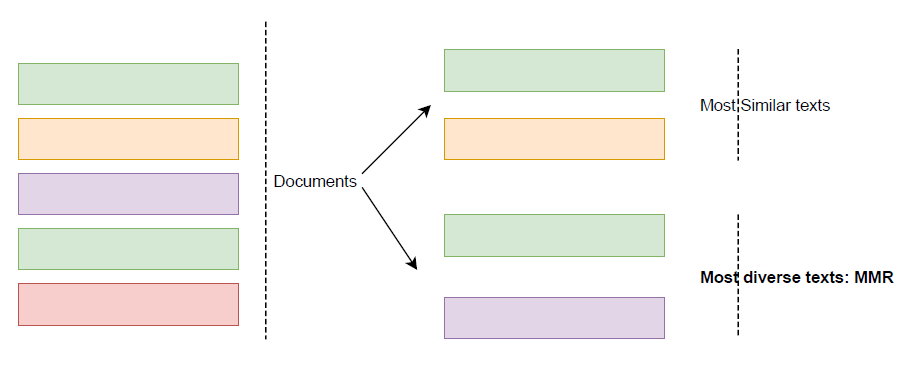

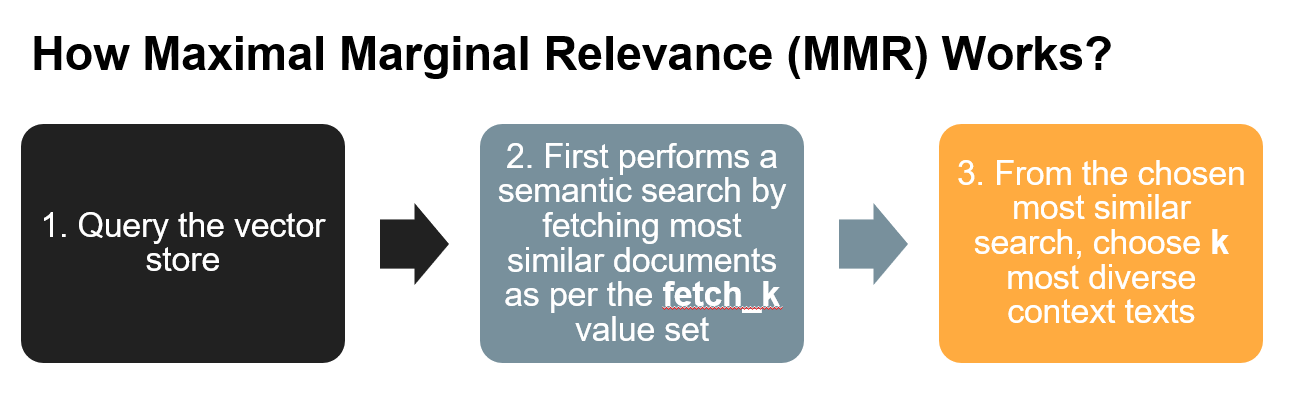

In [58]:
# Run using MMR
# k number of diverse docs will be returned from the fetch_k docs retrived using similarity search
response = vector_db.max_marginal_relevance_search(
    query="Tell me about a programming language used for data science", k=3, fetch_k=5)
print_resp_and_source(response)

==> Content 1: Python has particularly gained popularity in data science and machine learning due to its ease of use and the availability of powerful libraries and frameworks.
==> Source 1: {'source': 'document 5', 'page': 5}
--------------------------------------------------------------------------------------------------------
==> Content 2: Python has gained strong community support in data science, with numerous online resources, forums, and tutorials available.
==> Source 2: {'source': 'document 24', 'page': 24}
--------------------------------------------------------------------------------------------------------
==> Content 3: Python programming language has a vast ecosystem of third-party libraries that extend its functionality.
==> Source 3: {'source': 'document 15', 'page': 15}
--------------------------------------------------------------------------------------------------------


## Contextual Compression Retriever


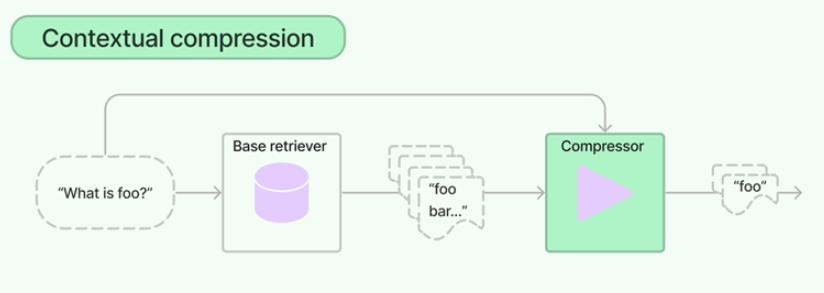

- The goal of contextual compression is to ensure that the compressed context retains the same meaning as the original documents while being more precise.
- Relevant documents can be compressed into two or three sentences using an LLM to extract the required information.
- The compressed information is then used to make a final call to the LLM for answering the question.
- By achieving effective compression, the cost of the final LLM call can be reduced. However, it requires multiple calls to the LLM initially for obtaining the compressed context.
- However, the drawback of this approach is the increased cost due to the multiple LLM calls needed for information compression.
- It is worth mentioning that the context compression process relies on utilizing an LLM.

### Setup all required LLMs

In [104]:
# if you prefer using OpenAI models directly
# from langchain.llms import OpenAI
# llm = OpenAI(temperature=0, openai_api_key=openai.api_key)

In [108]:
# Set the names of model. Use deployed model names if Azure Open AI. Else use direct model names if using open ai
gpt4turbo_model = "EAGPT4" # "gpt-4-turbo-preview"
chatgpt_model = "EAGPT35" # "gpt-3.5-turbo-1106"

In [109]:
from langchain.chat_models import AzureChatOpenAI

gpt4_turbo_llm = AzureChatOpenAI(
        openai_api_base=os.getenv("AZURE_OPENAI_ENDPOINT"),
        openai_api_version=os.getenv("AZURE_API_VERSION"),
        deployment_name=gpt4turbo_model,
        openai_api_key=os.getenv("AZURE_OPENAI_API_KEY"),
        openai_api_type="azure",
        temperature=0.0
    )

chatgpt_llm = AzureChatOpenAI(
        openai_api_base=os.getenv("AZURE_OPENAI_ENDPOINT"),
        openai_api_version=os.getenv("AZURE_API_VERSION"),
        deployment_name=chatgpt_model,
        openai_api_key=os.getenv("AZURE_OPENAI_API_KEY"),
        openai_api_type="azure",
        temperature=0.0
    )

Quick check if LLM call works

In [98]:
gpt4_turbo_llm.invoke("explain a computer in a sarcastic way in 1 line")

AIMessage(content="Oh, it's just a magical box that crashes whenever you need it the most.")

In [99]:
chatgpt_llm.invoke("explain NLP in a sarcastic way in 1 line")

AIMessage(content="Oh, NLP? It's just a fancy way for computers to pretend they understand human language, but we all know they're clueless.")

In [80]:
import warnings
warnings.filterwarnings("ignore")

In [110]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor

**LLMChainExtractor** is Document Compressor that uses an LLM Chain to extract the relevant parts of the document instead of the whole document

In [111]:
compressor = LLMChainExtractor.from_llm(gpt4_turbo_llm)

compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor,
    base_retriever=vector_db.as_retriever()
)


In [112]:
compressed_docs = compression_retriever.get_relevant_documents("What areas is Python mostly used")
print_resp_and_source(compressed_docs)

==> Content 1: Python can be used for developing web applications using frameworks like Django and Flask.
==> Source 1: {'source': 'document 18', 'page': 18}
--------------------------------------------------------------------------------------------------------
==> Content 2: Python has particularly gained popularity in data science and machine learning due to its ease of use and the availability of powerful libraries and frameworks.
==> Source 2: {'source': 'document 5', 'page': 5}
--------------------------------------------------------------------------------------------------------
==> Content 3: Python has become popular for data science due to new useful packages.
==> Source 3: {'source': 'document 25', 'page': 25}
--------------------------------------------------------------------------------------------------------
==> Content 4: Python has gained strong community support in data science, with numerous online resources, forums, and tutorials available.
==> Source 4: {'source'

In [113]:
compressed_docs = compression_retriever.get_relevant_documents("Tell me about a programming language used for data science")
print_resp_and_source(compressed_docs)

==> Content 1: Python has particularly gained popularity in data science and machine learning due to its ease of use and the availability of powerful libraries and frameworks.
==> Source 1: {'source': 'document 5', 'page': 5}
--------------------------------------------------------------------------------------------------------
==> Content 2: Python has become popular for data science due to new useful packages.
==> Source 2: {'source': 'document 25', 'page': 25}
--------------------------------------------------------------------------------------------------------
==> Content 3: Python has gained strong community support in data science, with numerous online resources, forums, and tutorials available.
==> Source 3: {'source': 'document 24', 'page': 24}
--------------------------------------------------------------------------------------------------------
==> Content 4: Python is a general-purpose language suitable for web development, data analysis, AI, machine learning, and automa

Remember the documents which were retrived without any compression technique when we queried vector db directly ?

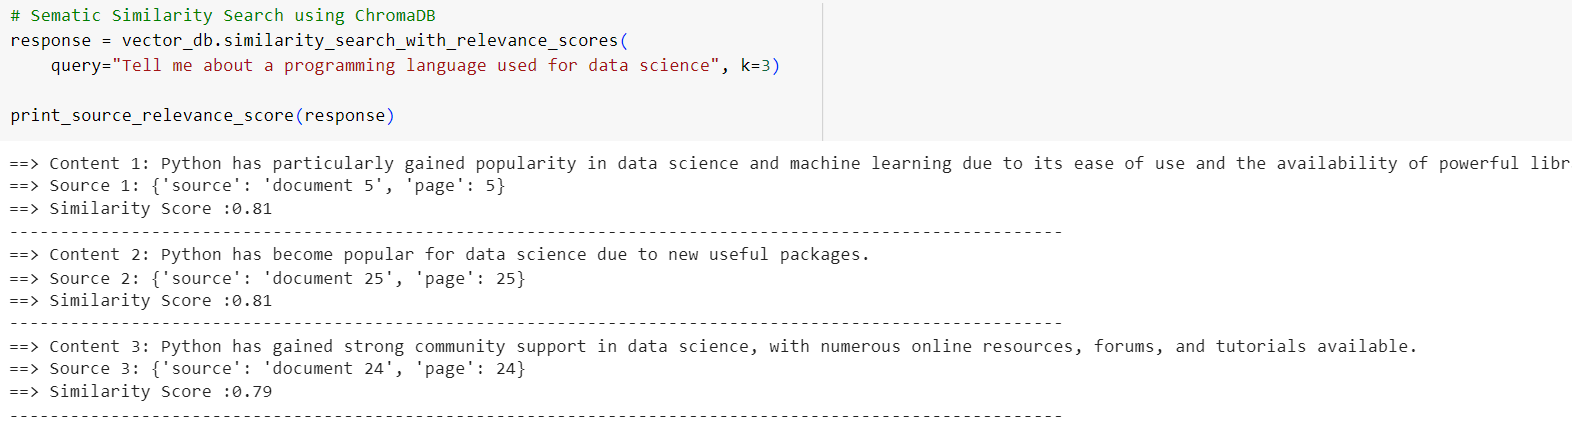



In [95]:
compressed_docs = compression_retriever.get_relevant_documents("How is Python's community support?")
print_resp_and_source(compressed_docs)

==> Content 1: Python has a large and active community that develops libraries, provides documentation, and offers support to newcomers.
==> Source 1: {'source': 'document 4', 'page': 4}
--------------------------------------------------------------------------------------------------------
==> Content 2: Python has gained strong community support in data science, with numerous online resources, forums, and tutorials available.
==> Source 2: {'source': 'document 24', 'page': 24}
--------------------------------------------------------------------------------------------------------


## Answer Generation Techniques in RAG

We have got exposed to several techniques to search and retrive the relevant documents. Let's look at some techniques to answer the question

Chain in LangChain is pure magic. Here is a cheatsheet for chains https://pbs.twimg.com/media/FwuWeOgaMAA3eVZ?format=jpg&name=4096x4096

* Map Reduce
* Refine
* Map Rerank

### Map Reduce
In Map Reduce, each document or chunk is processed individually by the LLM to obtain an initial answer, and these individual answers are then combined to form a final answer. This process involves making multiple LLM calls.

However, Map Reduce can sometimes produce worse results compared to other methods. This is because the relevant information is spread across multiple documents, making it challenging to locate. It's like searching for a needle in a haystack where the needle is present but not easily found due to the distribution across document chunks.

The advantage of Map Reduce is that if the answer or information being sought is present in multiple documents, there is an opportunity to examine each document and utilize its content to answer the question effectively. This approach overcomes limitations related to the context window size and allows for comprehensive analysis.

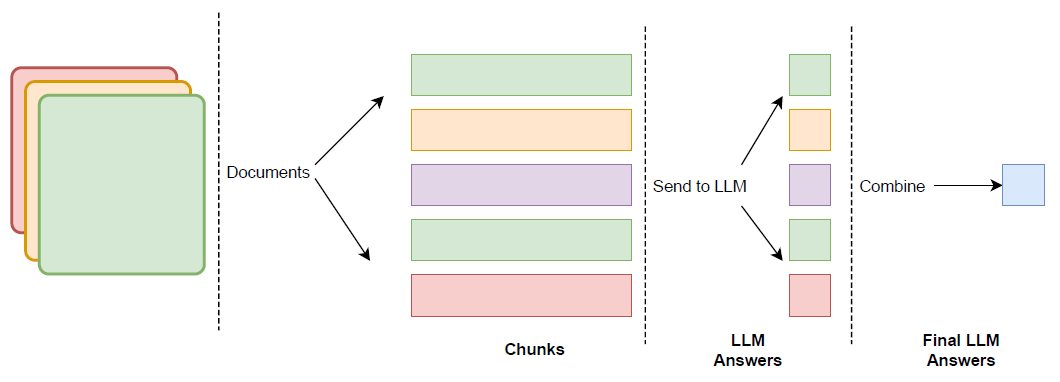

In [121]:
from langchain.prompts import PromptTemplate
from langchain.chains import RetrievalQA
# from langchain.chat_models import ChatOpenAI


In [122]:
def print_chain_results(response):
  print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
  print(f"==> Query : {response['query']}")
  print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
  print(f"==> Answer : {response['result']}")
  print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
  print(f"==> Sources : ")
  for i in range(len(response['source_documents'])):
    print(response['source_documents'][i])
  print("------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")



In [ ]:


# create chat model
# llm = ChatOpenAI(openai_api_key=openai.api_key, temperature=0)

Let's use a RetrivevalQA Chain to answer questions

In [125]:
# create prompt
QA_prompt = PromptTemplate(
    template="""Use the following pieces of context to answer the user question.
Context: {text}
Question: {question}
Answer:""",
    input_variables=["text", "question"]
)

# create retriever chain
qa_chain = RetrievalQA.from_chain_type(
    llm=gpt4_turbo_llm,
    retriever=vector_db.as_retriever(),
    return_source_documents=True,
    chain_type="map_reduce"
)

# question
question = "What areas is Python mostly used?"

# call QA chain
response = qa_chain({"query": question})

print_chain_results(response)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
==> Query : What areas is Python mostly used?
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
==> Answer : Python is mostly used in data science, machine learning, and web application development.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
==> Sources : 
page_content='Python has particularly gained popularity in data science and machine learning due to its ease of use and the availability of powerful libraries and frameworks.' metadata={'source': 'document 5', 'page': 5}
page_content='Python can be used for developing web applications using frameworks like Dja

In [126]:
combine_template = "Write a summary of the following text:\n\n{summaries}"

combine_prompt_template = PromptTemplate.from_template(
    template=combine_template)

question_template = """Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer. Use three sentences maximum. Keep the answer as concise as possible. Always say "thanks for asking!" at the end of the answer.
{context}
Question: {question}
Helpful Answer:"""
question_prompt_template = PromptTemplate.from_template(
    template=question_template)

# create retriever chain
qa_chain = RetrievalQA.from_chain_type(
    llm=gpt4_turbo_llm,
    # mmr > for diversity in documents
    # Set fetch_k value to get the fetch_k most similar search. This is basically semantic search
    retriever=vector_db.as_retriever(
        search_kwargs={'fetch_k': 4, 'k': 3}, search_type='mmr'),
    return_source_documents=True,
    chain_type="map_reduce",
    chain_type_kwargs={"question_prompt": question_prompt_template,
                       "combine_prompt": combine_prompt_template}
)

# question
question = "What areas is Python mostly used"

# call QA chain
response = qa_chain({"query": question})

print_chain_results(response)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
==> Query : What areas is Python mostly used
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
==> Answer : Python is a versatile programming language widely used in web application development, data analysis, machine learning, artificial intelligence, and automation scripting. Its popularity in data science is attributed to the availability of useful packages, strong community support, and numerous online resources.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
==> Sources : 
page_content='Python can be used for developing web applications using frameworks like Dj

### Refine

During the Refine process, each document chunk is sent to the LLM along with the prompt question.
* An initial answer is generated based on this input.
* Subsequently, the next document chunk is processed by the LLM, refining or fine-tuning the previous answer using the information from the new document.
* This iteration continues for all the remaining documents until a correct answer is obtained.

**Problem ?** The number of LLM calls is directly proportional to the number of documents, which increases the cost. However, a drawback of this approach is that it requires making multiple LLM calls for each document retrieved. Consequently, the cost increases with a larger number of documents. 🤑

Moreover, what if none of the retrieved documents contain the answer we are looking for? 😰

On the other hand, this approach offers advantages over the "map reduce" chain. With each iteration over a document, the final answer is further fine-tuned, potentially leading to better results. For example, if the answer we seek is located in the fourth document, we will continually refine our answer until we arrive at the correct solution. This refinement process preserves and carries over more information compared to the map reduce strategy, allowing for potentially improved outcomes.

In [128]:
### Refine
# create prompt
QA_prompt = PromptTemplate(
    template="""Use the following pieces of context to answer the user question.
Context: {text}
Question: {question}
Answer:""",
input_variables=["text", "question"]
)

# create retriever chain
qa_chain = RetrievalQA.from_chain_type(
    llm=gpt4_turbo_llm,
    retriever=vector_db.as_retriever(),
    return_source_documents = True,
    chain_type="refine",
)

# question
question = "What areas is Python mostly used"

# call QA chain
response = qa_chain({"query": question})

print_chain_results(response)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
==> Query : What areas is Python mostly used
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
==> Answer : Python is widely used in various fields such as web and internet development, scientific and numeric computing, education, desktop GUIs, software development, and business applications. However, it has become particularly popular in the fields of data science, artificial intelligence, and machine learning. This is largely due to the development of powerful packages and libraries that have made Python a versatile tool for handling, analyzing, and visualizing data. These packages have simplified complex tasks, making Python a preferred choice for data scientists and researchers. Addition

In [131]:
### Stuff
# create prompt
QA_prompt = PromptTemplate(
    template="""Use the following pieces of context to answer the user question. Do NOT ANSWER ANYTHING OUTSIDE THE CONTEXT PROVIDED.
Context: {text}
Question: {question}
Answer:""",
input_variables=["text", "question"]
)

# create chat model
# llm = ChatOpenAI(openai_api_key=openai.api_key, temperature=0)

# create retriever chain
qa_chain = RetrievalQA.from_chain_type(
    llm=gpt4_turbo_llm,
    retriever=vector_db.as_retriever(),
    return_source_documents = True,
    chain_type="stuff"
)

# question
question = "What areas is Python mostly used"

# call QA chain
response = qa_chain({"query": question})

print_chain_results(response)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
==> Query : What areas is Python mostly used
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
==> Answer : Python is mostly used in developing web applications and in the fields of data science and machine learning. It has gained popularity due to its ease of use, the availability of powerful libraries and frameworks, and strong community support.
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
==> Sources : 
page_content='Python can be used for developing web applications using frameworks like Django and Flask.' metadata={'source': 'document 18', 'page': 18}
page_c